In [ ]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset

df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016 (1).csv')

In [ ]:
cat=df.select_dtypes(include="object").columns
cat

Index(['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer',
       'Rating'],
      dtype='object')

In [ ]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [ ]:
# checking the null values
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
df=df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]

In [ ]:
df.isnull().sum()

NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
x = df.drop(['Global_Sales'], axis = 1)
y = df['Global_Sales'] # target variable

In [ ]:
# Select columns to encode
columns_to_encode = ['Platform', 'Rating','Genre']


In [ ]:

# Perform one hot encoding
one_hot_encoded = pd.get_dummies(df[columns_to_encode])

In [ ]:
# Combine one hot encoded columns with original data
data_encoded = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
# Remove original categorical columns
data_encoded.drop(df[columns_to_encode], axis=1, inplace=True)

In [ ]:
# View the encoded data
data_encoded.head()

,Name,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,Wii Sports,2006.0,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,...,0,0,0,0,0,0,0,0,1,0
2,Mario Kart Wii,2008.0,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,...,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,2009.0,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,...,0,0,0,0,0,0,0,0,1,0
6,New Super Mario Bros.,2006.0,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,...,0,0,1,0,0,0,0,0,0,0
7,Wii Play,2006.0,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,...,0,1,0,0,0,0,0,0,0,0


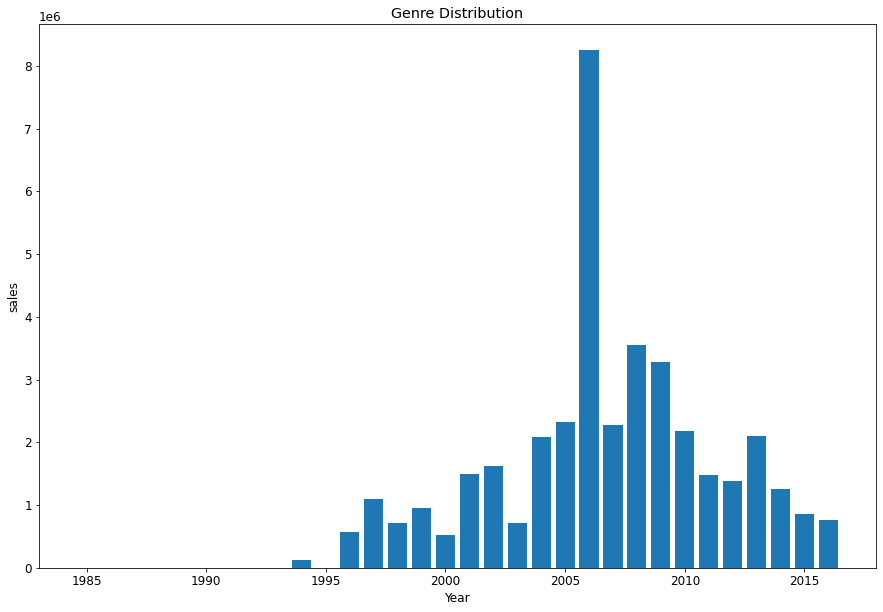

In [ ]:
# plot for year vs sales
plt.figure(figsize=(15,10))
plt.bar(df['Year_of_Release'],(df['Global_Sales']*100000))
plt.title('Genre Distribution')
plt.xlabel('Year')
plt.ylabel('sales')
plt.show()

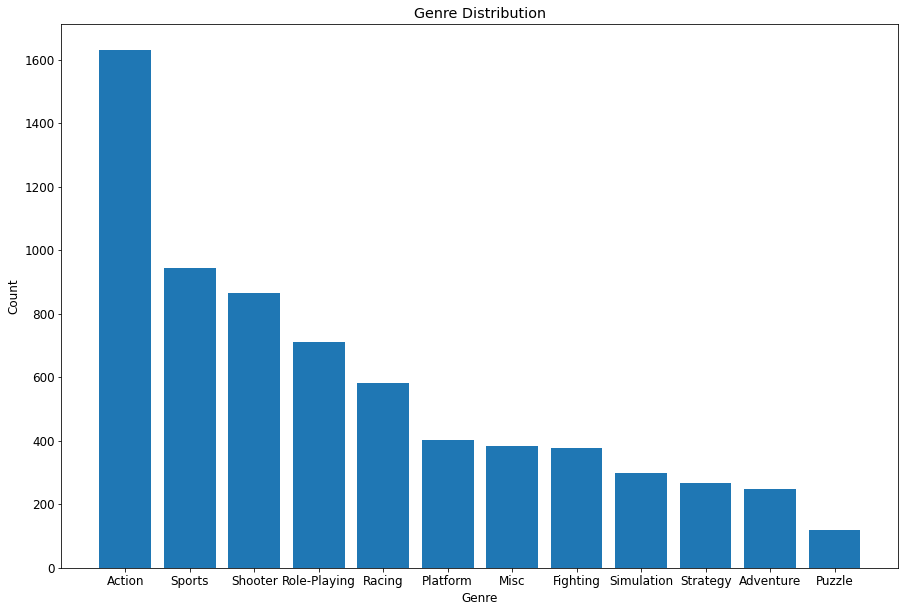

In [ ]:
# polt for genre vs count
genre_counts=df['Genre'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

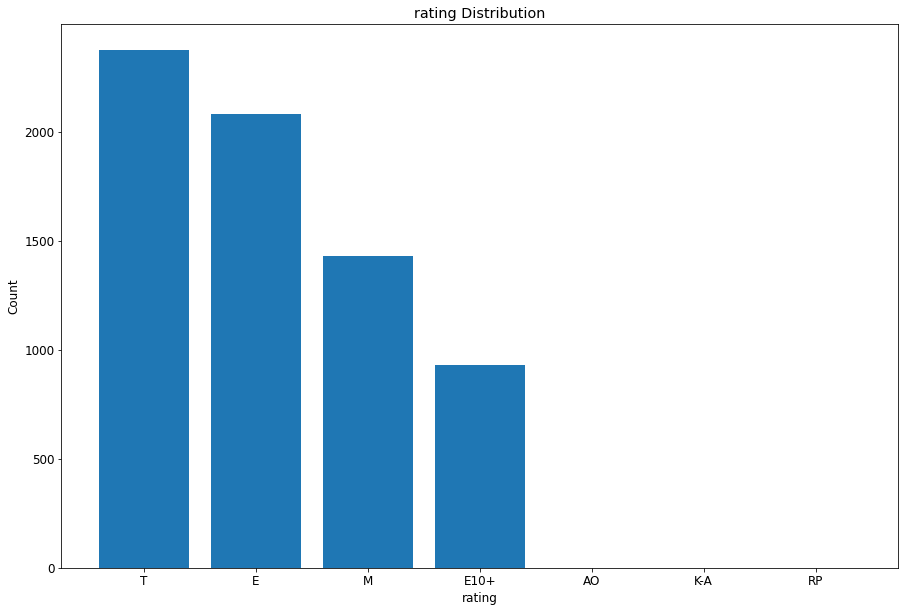

In [ ]:
# plot  for Rating vs count
rating_count=df['Rating'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(rating_count.index,rating_count.values)
plt.title('rating Distribution')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

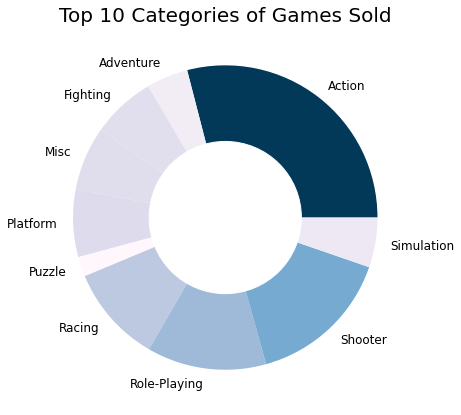

In [ ]:
# Pie plot

import matplotlib as mpl
game = df.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin = min(game), vmax = max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels = game.index, colors = colours)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12)
plt.title("Top 10 Categories of Games Sold", fontsize = 20)
plt.show()

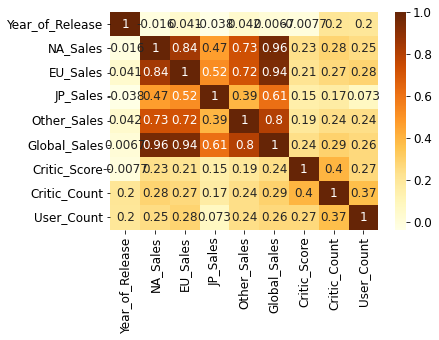

In [ ]:
# Heatmap

sns.heatmap(df.corr(), cmap = "YlOrBr", annot = True)
plt.show()

In [ ]:
# creating a class for Lasso Regression

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = 0.1

    self.no_of_iterations = 100

    self.lambda_parameter = 0.1


  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()


  # function for updating the weight & bias value
  def update_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m 

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

    


  # Predicting the Target variable
  def predict(self,X):

    return X.dot(self.w) + self.b

In [ ]:
# Split the data into training and testing sets
train_size = int(0.8 * len(df))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [ ]:
def mean_squared_error(Y_true, Y_pred):
    # Compute the mean squared error between Y_true and Y_pred
    mse = np.mean((Y_true - Y_pred)**2)
    return mse

In [ ]:
def r2_score(y_true, y_pred):
    '''
    Calculate R2 score from scratch.
    
    Parameters:
        y_true (array-like): true y values.
        y_pred (array-like): predicted y values.
        
    Returns:
        r2_score (float): R2 score.
    '''
    import numpy as np
    
    # Calculate the mean of the dependent variable y
    y_mean = np.mean(y_true)
    
    # Calculate the total sum of squares (TSS)
    tss = np.sum((y_true - y_mean)**2)
    
    # Calculate the residual sum of squares (RSS)
    rss = np.sum((y_true - y_pred)**2)
    
    # Calculate R2 score
    r2_score = 1 - (rss / tss)
    
    return r2_score


In [ ]:
#define the parameters
param = {
    "lamda" : 0.1,
    "learning_rate" : 0.1,
    "iteration" : 100
}
print("="*100)
linear_reg = LassoRegression(**param)

# Train the model.
linear_reg.train(X, y) 

# Predict the values.
y_pred = linear_reg.predict(X)
#Root mean square error.
score = r2_score(y, y_pred)
print("The r2_score of the trained model", score)
# mse of test and pred 
mse = mean_squared_error(y, y_pred)
print("Mean squared error:", mse)

The Cost function for the iteration 10----->1110.7066725116993 :)
The Cost function for the iteration 20----->162.81389972913985 :)
The Cost function for the iteration 30----->44.84630118806577 :)
The Cost function for the iteration 40----->30.153051253285383 :)
The Cost function for the iteration 50----->28.321528016369097 :)
The Cost function for the iteration 60----->28.093061419918836 :)
The Cost function for the iteration 70----->28.064544659957996 :)
The Cost function for the iteration 80----->28.0609836677614 :)
The Cost function for the iteration 90----->28.06053877749521 :)
The Cost function for the iteration 100----->28.060483058151377 :)
The r2_score of the trained model 0.9999941664294233
Mean squared error: 0.08281714900456029


In [ ]:
# Define hyperparameters to search over
alpha_values = [0.001, 0.01, 0.1, 1.0]

In [ ]:
# Define function to perform Lasso regression and return mean squared error
def lasso_regression(X_train, y_train, X_test, y_test, alpha):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [ ]:
# Define function to perform grid search
def grid_search(X, y, alpha_values):
    results = []
    for alpha in alpha_values:
        mse = lasso_regression(X_train, y_train, X_test, y_test, alpha)
        results.append(mse)
    best_alpha = alpha_values[np.argmin(results)]
    return best_alpha

In [ ]:
# Split data into training and testing sets
np.random.seed(0)
indices = np.random.permutation(len(X))
train_size = int(0.8 * len(X))
X_train = X[indices[:train_size]]
y_train = y[indices[:train_size]]
X_test = X[indices[train_size:]]
y_test = y[indices[train_size:]]

In [ ]:

# Perform grid search
best_alpha = grid_search(X_train, y_train, alpha_values)

In [ ]:

# Fit model with best hyperparameters on entire training set
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:

# Evaluate model on test set
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE: ", mse)

Test MSE:  8.24134327568166e-06
